# PREDICTION MODEL FOR CREDIT CARD APPROVAL
Oltolini Edoardo, 869124

Pulcino Federico, 872491

## Objectives:
**The purpose of the project, given a dataset containing individuals information (such as gender, age, occupational state...), is to train Machine Learning Models that let you foresee the outcome (positive / negative) of a request for credit card approval.**

# Dataset description
Il dataset usato per questo progetto è un dataset di richieste di carte di credito. Il dataset è stato scaricato da https://archive.ics.uci.edu/dataset/27/credit+approval e contiene 690 istanze, ognuna delle quali rappresenta una richiesta di carta di credito. Ogni istanza è composta da 16 attributi:
- X: attributo identificativo della richiesta;
- Age: età del richiedente
- Male: attributo binario che indica il sesso del richiedente (a = maschio, b = femmina);
- Debt: debito del richiedente;
- Married: attributo che indica se il richiedente è sposato;
- backCustomer: attributo che indica se il richiedente è un cliente della banca;
- etnicity: etnia del richiedente;
- yearsemployed: anni di lavoro del richiedente;
- PriorDefault: attributo binario che indica se il richiedente ha avuto problemi di pagamento in passato;
- Employed: attributo binario che indica se il richiedente è attualmente impiegato;
- CreditScore: punteggio di credito del richiedente;
- DriversLicence: attributo binario che indica se il richiedente ha una patente;
- Citizen: attributo binario che indica se il richiedente è cittadino;
- ZipCode: codice postale del richiedente;
- Income: reddito del richiedente;
- Approved: attributo binario che indica se la richiesta è stata approvata o meno (+ = approvata, -= non approvata).


In [5]:
import pandas as pd
# Load data

df = pd.read_csv('credit.csv')

# number of rows and columns
print(df.shape)

# describe columns type
print(df.dtypes)

(690, 16)
X                  int64
male              object
age              float64
debt             float64
married           object
backCustomer      object
etnicity          object
yearemployed     float64
priordefault      object
employed          object
creditScore        int64
driverlicence     object
citizen           object
zipcode          float64
income             int64
approved          object
dtype: object


# Data Preprocessing

La fase di preprocessing dei dati ha comportato una serie di modifiche al dataset iniziale, tutte volte a ottimizzare le successive analisi dei dati e l’applicazione della Principal Component Analysis (PCA).

Innanzitutto, abbiamo caricato il nostro dataset da un file CSV, abbiamo poi esaminato i tipi di dati presenti in ciascuna colonna e visualizzato le prime cinque righe del dataset, per avere un’idea chiara della struttura dei dati con cui stavamo lavorando.

Successivamente, abbiamo proseguito con la pulizia dei dati, eliminando le righe con valori mancanti. Questo passaggio è fondamentale per garantire l’integrità dei dati e prevenire potenziali distorsioni nei risultati delle analisi. Inoltre l'eliminazione delle righe con valori mancanti è stata possibile grazie al fatto che il dataset iniziale conteneva un numero sufficiente di righe per poter permettere l'eliminazione di alcune di esse senza compromettere la qualità dei dati.

Abbiamo poi proceduto con la trasformazione delle variabili categoriche in numeri. Questo è un passaggio essenziale, poiché la PCA e molti altri algoritmi di Machine Learning possono gestire solo variabili numeriche.

Inoltre, abbiamo rinominato alcune colonne per migliorare la leggibilità e la comprensione dei dati. Questo ci ha permesso di avere un dataset più coerente e facilmente interpretabile.

Infine, abbiamo mappato i valori di alcune colonne, trasformando le categorie originali in valori numerici o in categorie più comprensibili. In modo da semplificare l’interpretazione dei dati e a facilitare le successive analisi.

In [ ]:
df = pd.read_csv('credit.csv')

# clean data and show how many rows are dropped
print(df.shape)
df = df.dropna()
print(df.shape)

# Change column X to ID
df = df.rename(columns={'X': 'ID'})

# Change column name male to Gender
df = df.rename(columns={'male': 'Gender'})

# Change gender to 0 and 1
df['Gender'] = df['Gender'].map({'a': 0, 'b': 1})

# Change married to 0 and 1
df['married'] = df['married'].map({'u': 1, 'y': 0, 'l': 0})

# Change backCustomer to BankCustomer and change to 0 and 1
df = df.rename(columns={'backCustomer': 'BankCustomer'})
df['BankCustomer'] = df['BankCustomer'].map({'g': 1, 'gg': 0, 'p': 0})

# change etnicity to White, Black, Latin, Other
df = df.rename(columns={'etnicity': 'Ethnicity'})
df['Ethnicity'] = df['Ethnicity'].map({'v': "White", 'h': "Black", 'z': "Other", 'o': "Other", 'n': "Other", 'ff': "Latin", 'j': "Other", 'dd': "Other", 'bb': "Other"})

# change PriorDefault to 0 and 1
df = df.rename(columns={'priordefault': 'PriorDefault'})
df['PriorDefault'] = df['PriorDefault'].map({'t': 1, 'f': 0})

# change Employed to 0 and 1
df = df.rename(columns={'employed': 'Employed'})
df['Employed'] = df['Employed'].map({'t': 1, 'f': 0})

# change DriversLicense to 0 and 1
df = df.rename(columns={'driverlicence': 'DriversLicense'})
df['DriversLicense'] = df['DriversLicense'].map({'t': 1, 'f': 0})

# change Citizen to byBirth, byOtherMeans, Temporary
df = df.rename(columns={'citizen': 'Citizen'})
df['Citizen'] = df['Citizen'].map({'g': "byBirth", 's': "byOtherMeans", 'p': "Temporary"})

# change approved to 0 and 1
df = df.rename(columns={'approved': 'Approved'})
df['Approved'] = df['Approved'].map({'-': 0, '+': 1})

In [11]:
# LIBRARIES
from IPython.display import Image
from graphviz import Digraph
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score, precision_recall_curve, auc

Head of the Dataset:

  male    age   debt married backCustomer etnicity  yearemployed priordefault  \
0    b  30.83  0.000       u            g        v          1.25            t   
1    a  58.67  4.460       u            g        h          3.04            t   
2    a  24.50  0.500       u            g        h          1.50            t   
3    b  27.83  1.540       u            g        v          3.75            t   
4    b  20.17  5.625       u            g        v          1.71            t   

  employed  creditScore driverlicence citizen  income approved  
0        t            1             f       g       0        +  
1        t            6             f       g     560        +  
2        f            0             f       g     824        +  
3        t            5             t       g       3        +  
4        f            0             f       s       0        +  

Plot on Target Variable:


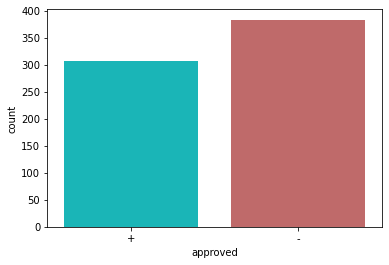

In [12]:
# Read the dataset
cred = pd.read_csv("credit.csv")

# Data Cleaning: Remove the 'X' column, it's an ID repetition (useless for classification)
cred = cred.drop(columns=['X'])
# Remove the 'zipcode' column (useless for classification)
cred = cred.drop(columns=['zipcode'])

print("Head of the Dataset:\n")
print(cred.head())
print("\nPlot on Target Variable:")
sns.countplot(x='approved', data=cred, palette=['darkturquoise', 'indianred'])
plt.show()

In [13]:
cred.dtypes

male              object
age              float64
debt             float64
married           object
backCustomer      object
etnicity          object
yearemployed     float64
priordefault      object
employed          object
creditScore        int64
driverlicence     object
citizen           object
income             int64
approved          object
dtype: object

In [14]:
# Convert target column to int
target = ['approved']
cred[target] = cred[target].apply(LabelEncoder().fit_transform)
cred.dtypes

male              object
age              float64
debt             float64
married           object
backCustomer      object
etnicity          object
yearemployed     float64
priordefault      object
employed          object
creditScore        int64
driverlicence     object
citizen           object
income             int64
approved           int32
dtype: object

## Converting 0s into 1s (0: not approved, 1: approved)

int32


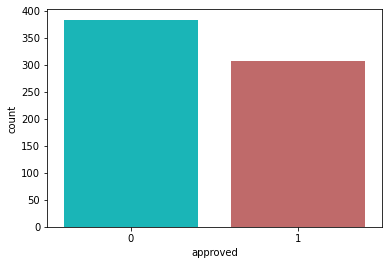

In [15]:
print(cred['approved'].dtype)
cred['approved'] = 1 - cred['approved']
sns.countplot(x='approved', data=cred, palette=['darkturquoise', 'indianred'])
plt.show()

## Exploratory Analysis on "credit.csv" Dataset

## Plot Of Numerical Variables Distributions

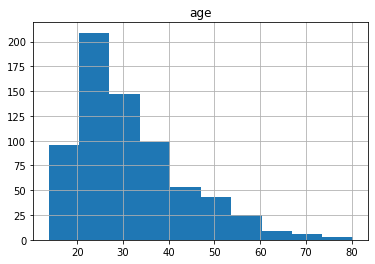

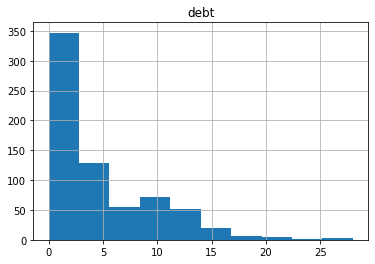

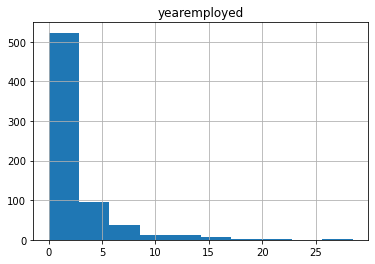

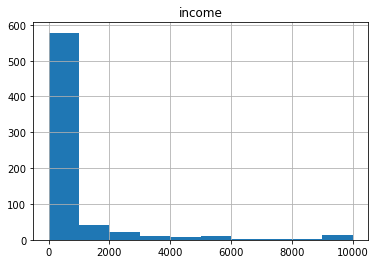

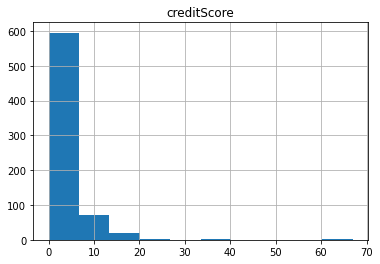

In [16]:
# Obtain the numerical columns
numerical_columns = ['age', 'debt', 'yearemployed', 'income', 'creditScore']

for column in numerical_columns:
    plt.figure()
    cred[column].hist()
    plt.title(column)

plt.show()

## Plot Of Non-Numerical Variables Distributions

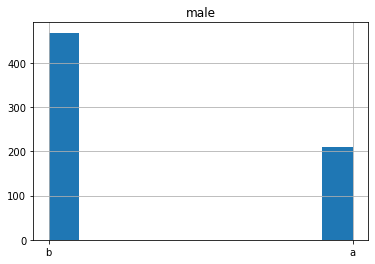

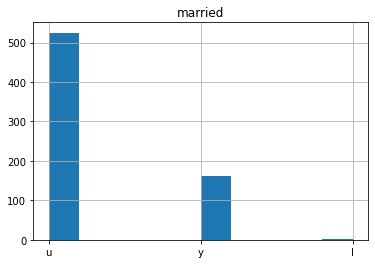

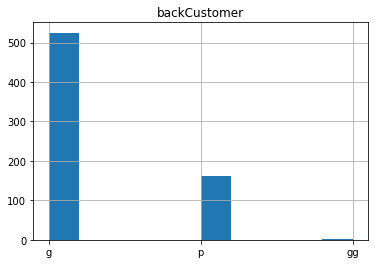

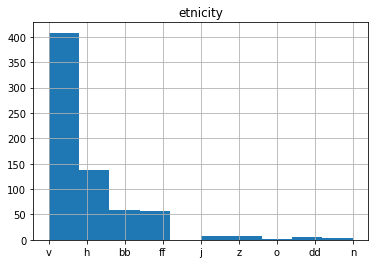

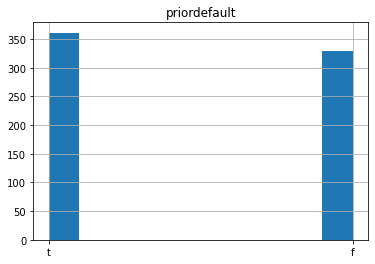

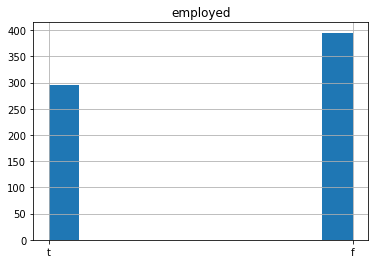

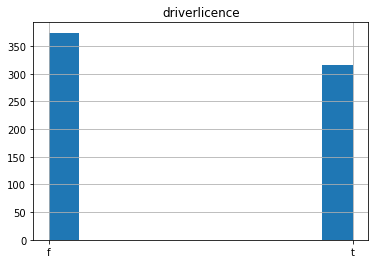

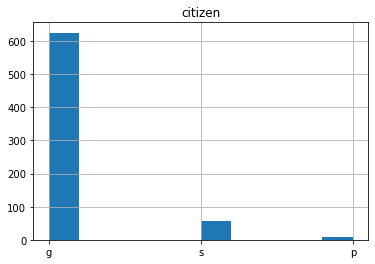

In [17]:
nonnumericals = ['male', 'married', 'backCustomer', 'etnicity', 'priordefault', 'employed', 'driverlicence', 'citizen']
for column in nonnumericals:
    plt.figure()
    cred[column].hist()
    plt.title(column)

plt.show()

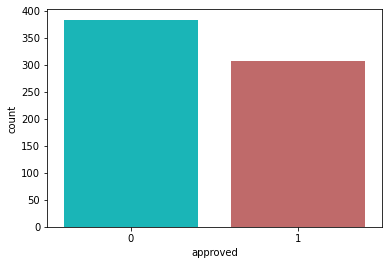

In [18]:
# Barplot for positive and negative outcomes using predefined palettes
sns.countplot(x='approved', data=cred, palette=['darkturquoise', 'indianred'])
plt.show()

**From the previous barplot: approved credit cards (1) numbers are less than those non-approved (0)**

barplot for male


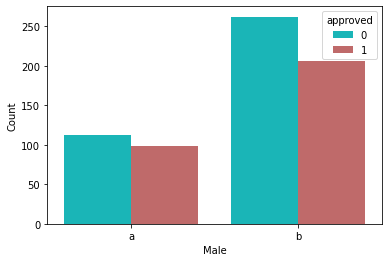

barplot for married


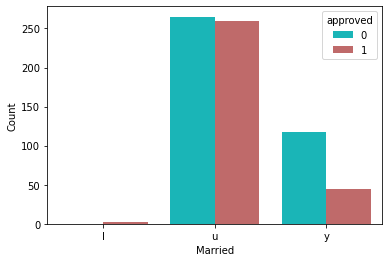

barplot for backCustomer


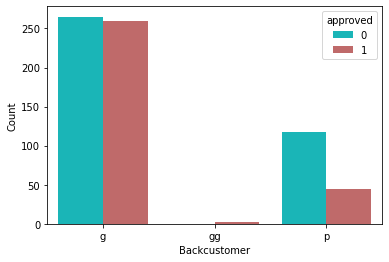

barplot for etnicity


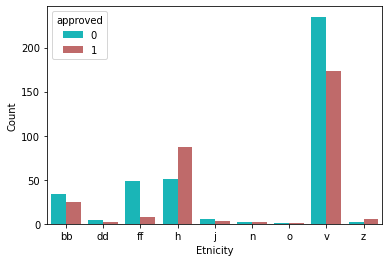

barplot for priordefault


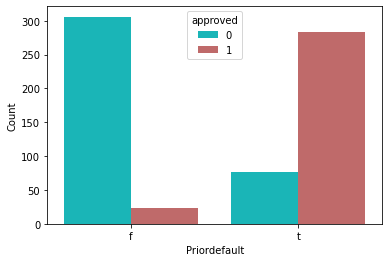

barplot for employed


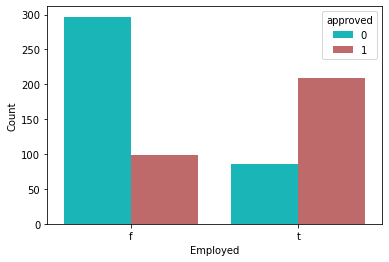

barplot for driverlicence


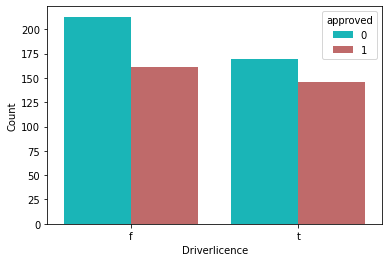

barplot for citizen


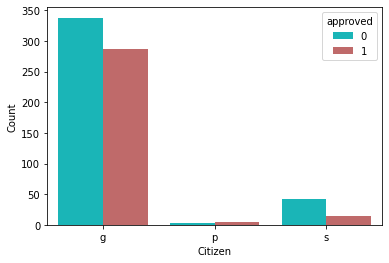

In [20]:
for column in nonnumericals:
    if column == 'approved':
        continue
    dat = cred.groupby([column, 'approved']).size().reset_index(name='Count')
    dat.rename(columns={column: column.capitalize()}, inplace=True)
    print("barplot for " + column)
    sns.barplot(x=column.capitalize(), y='Count', hue='approved', data=dat, palette=['darkturquoise', 'indianred'])
    plt.show()

Barplot for age with 'approved' = 0


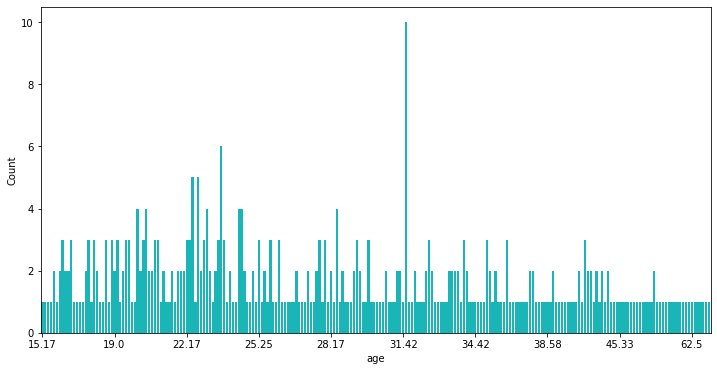

Barplot for debt with 'approved' = 0


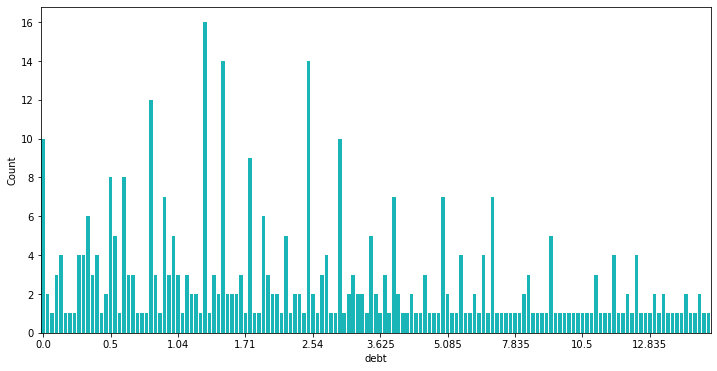

Barplot for yearemployed with 'approved' = 0


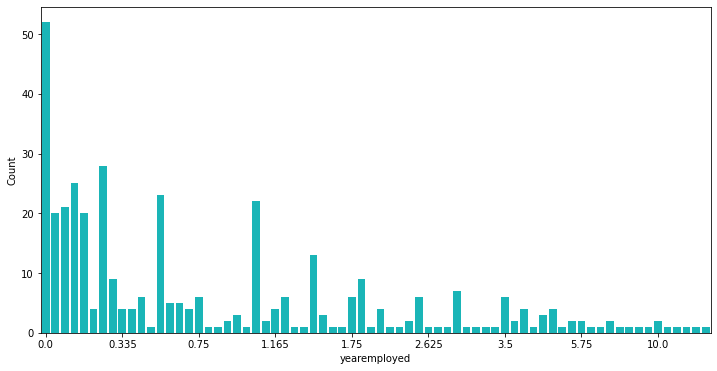

Barplot for income with 'approved' = 0


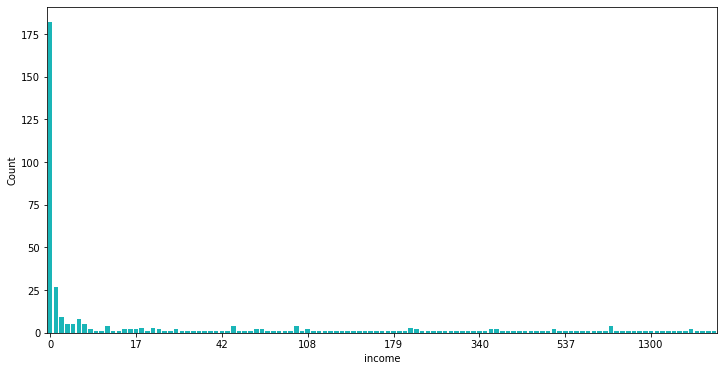

Barplot for creditScore with 'approved' = 0


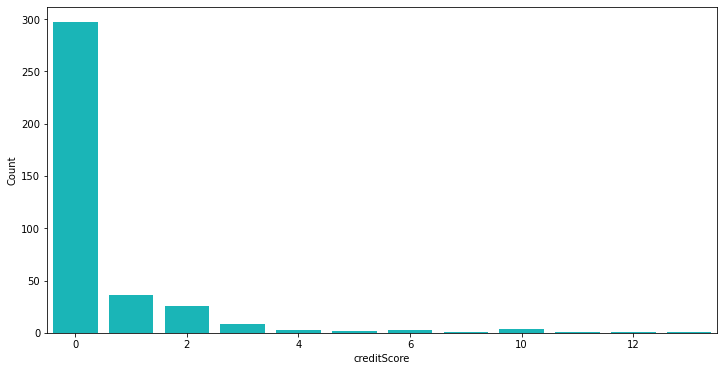

Barplot for age with 'approved' = 1


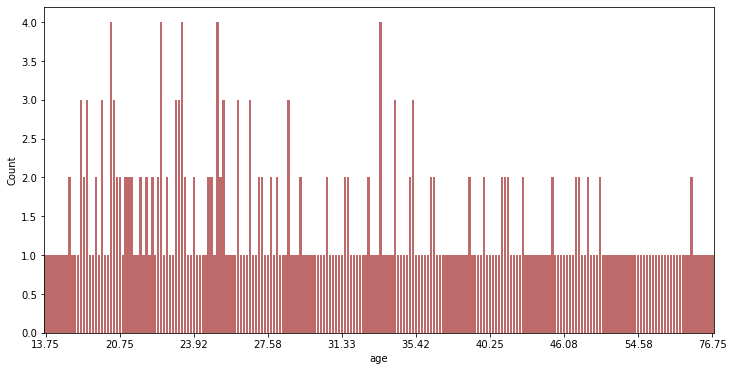

Barplot for debt with 'approved' = 1


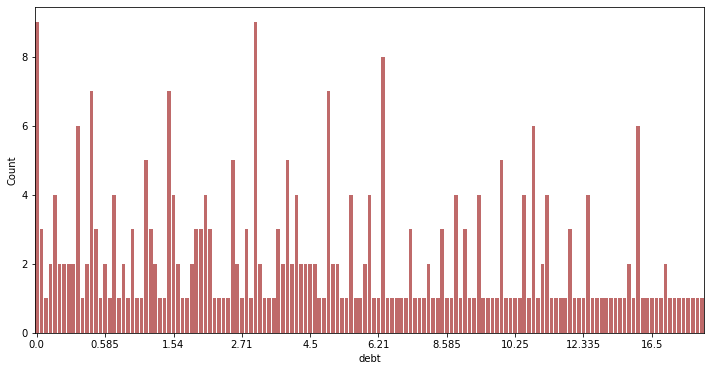

Barplot for yearemployed with 'approved' = 1


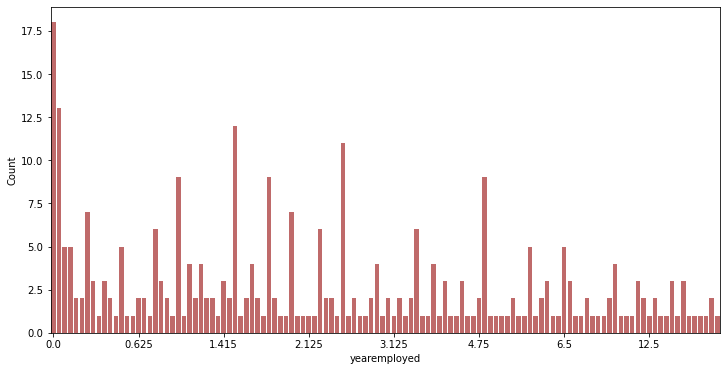

Barplot for income with 'approved' = 1


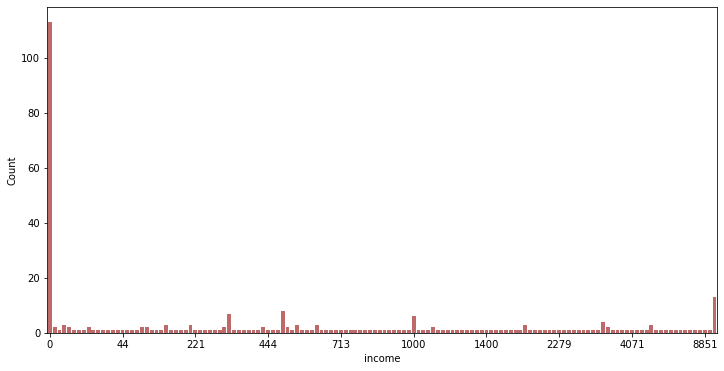

Barplot for creditScore with 'approved' = 1


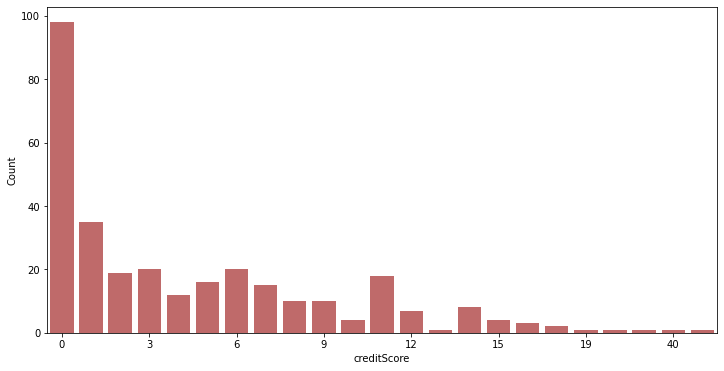

In [21]:
from matplotlib.ticker import MaxNLocator

# Obtain the numerical columns
numerical_columns = ['age', 'debt', 'yearemployed', 'income', 'creditScore']

for approved_value in [0, 1]:
    for column in numerical_columns:
        dat = cred[cred['approved'] == approved_value].groupby(column)['approved'].count().reset_index(name='Count')
        plt.figure(figsize=(12, 6))
        print(f"Barplot for {column} with 'approved' = {approved_value}")
        sns.barplot(x=column, y='Count', data=dat, color='darkturquoise' if approved_value == 0 else 'indianred')
        
        # Set x-axis ticks for integer values only
        plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True))
        plt.show()

# Principal Component Analysis (PCA)

In [22]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

#SCALING THE NUMERICAL COLUMNS
scaler = StandardScaler()
scaled_data = scaler.fit_transform(cred[numerical_columns])
scaled_data

array([[-0.06232358, -0.95661321, -0.29108264, -0.38207258, -0.28810053],
       [ 2.28809865, -0.06005053,  0.24419044, -0.06702035,  0.74082993],
       [-0.59674071, -0.8561017 , -0.21632383,  0.08150427, -0.49388662],
       ...,
       [-0.53342114,  1.7571976 , -0.06680621, -0.38150999, -0.28810053],
       [-1.15226435, -0.91540349, -0.65291528,  0.03987237, -0.49388662],
       [ 0.2897332 , -0.27816051,  1.81412545, -0.38207258, -0.49388662]])

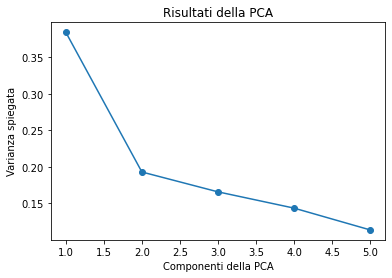

In [23]:
# LET'S COMPUTE THE PCA AND SHOW HOW MANY VARIANCE IS EXPLAINED BY EACH PRINCIPAL COMPONENT
import matplotlib.pyplot as plt

pca = PCA().fit(scaled_data)

# Crea un grafico della varianza spiegata per ogni componente
plt.plot(range(1, pca.n_components_ + 1), pca.explained_variance_ratio_, marker='o')
plt.xlabel('Componenti della PCA')
plt.ylabel('Varianza spiegata')
plt.title("Risultati della PCA")
plt.show()

In [24]:
# TO REDUCE THE DIMENSIONALITY OF THE DATASET: LET'S KEEP ONLY 4 PRINCIPAL COMPONENTS
pca = PCA(n_components=4).fit(scaled_data)
pca_data = pca.transform(scaled_data)

In [25]:
# LET'S QUANTIFY THE PERCENTAGE OF EXPLAINED VARIANCE FROM EACH COMPONENT
print(pca.explained_variance_ratio_)

[0.38412286 0.19293163 0.16575909 0.14349926]


In [26]:
# LET'S TAKE A LOOK TO EIGENVALUES COEFFICIENTS
eigenvalues = pca.explained_variance_
n_samples = scaled_data.shape[0]
cov_matrix = np.dot(scaled_data.T, scaled_data) / n_samples
for eigenvalue, eigenvector in zip(eigenvalues, pca.components_):
    print(np.dot(eigenvector.T, np.dot(cov_matrix, eigenvector)))
    print(eigenvalue)

1.9206143068609736
1.9234018457678832
0.9646581663297826
0.9660582507511598
0.8287954689087985
0.8299983650900882
0.717496304680153
0.7185376636129256


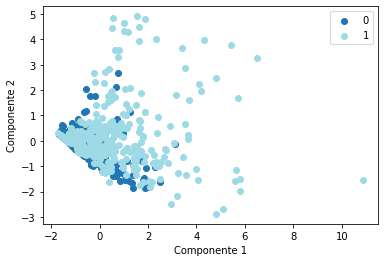

In [27]:
# NOW, LET'S CREATE A GRAPH OF PCA OBSERVATIONS

# crea una mappa etichetta-->codice colore
unique_labels = np.unique(cred["approved"])
colors = plt.cm.tab20(np.linspace(0, 1, len(unique_labels)))
label_to_color = dict(zip(unique_labels, colors))

# genera il grafico
fig, ax = plt.subplots()
for label in unique_labels:
    mask = (cred["approved"] == label).values
    ax.scatter(pca_data[mask, 0], pca_data[mask, 1], color=label_to_color[label], label=label)

ax.set_xlabel('Componente 1')
ax.set_ylabel('Componente 2')

ax.legend()

plt.show()

### Possiamo visualizzare ogni attributo in un grafico 2D il cui asse x indica il  contributo rispetto prima componente e l'asse y rispetto alla seconda componente. Visualizziamo le proiezioni.

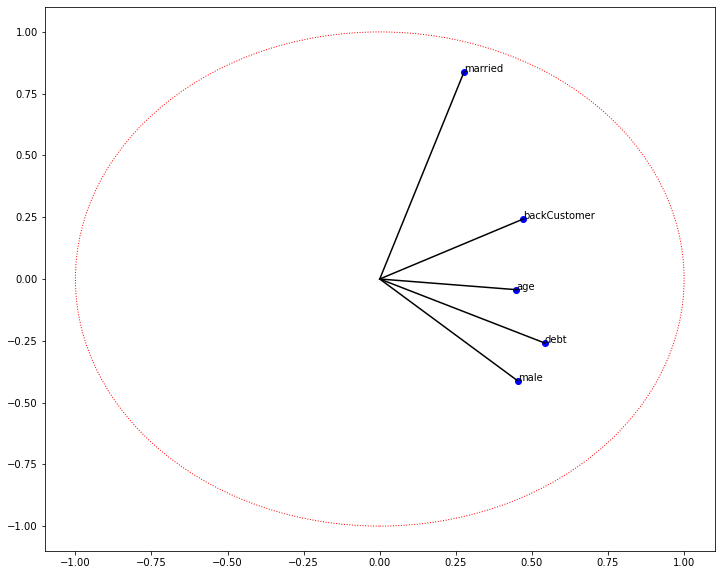

In [28]:
pcs = pca.components_
fig, ax = plt.subplots(figsize=(12, 10))

# Plot principal components
ax.scatter(pcs[0, :], pcs[1, :], color='blue', marker='o')

# Plot lines and labels
for i, (x, y) in enumerate(zip(pcs[0, :], pcs[1, :])):
    ax.plot([0, x], [0, y], color='k')
    ax.text(x, y, cred.columns[i], fontsize='10')

# Plot the circle
circle = plt.Circle((0, 0), 1, color='red', fill=False, linestyle='dotted')
ax.add_artist(circle)

# Set axis limits
ax.set_xlim([-1.1, 1.1])
ax.set_ylim([-1.1, 1.1])

# Display the plot
plt.show()

In [29]:
import pandas as pd

# Supponiamo che il tuo dataframe sia chiamato "cred"
# Itera attraverso tutte le colonne del dataframe
for column in cred.columns:
    if cred[column].dtype == 'object':
        # Trasforma la colonna in tipo categorico
        cred[column] = cred[column].astype('category')

cred.dtypes

male             category
age               float64
debt              float64
married          category
backCustomer     category
etnicity         category
yearemployed      float64
priordefault     category
employed         category
creditScore         int64
driverlicence    category
citizen          category
income              int64
approved            int32
dtype: object

### Modifiyng the dataset to maintain: debt, married, etnicity, employed, yearemployed, priordefault (and target variable "approved")

In [398]:
# List of columns to keep
columns_to_keep = ['approved', 'debt', 'married', 'etnicity', 'employed', 'yearemployed', 'priordefault']
# "age","debt","income","creditScore","yearemployed"
# columns_to_keep = ['approved', 'age', 'debt', 'income', 'creditScore', 'yearemployed']

# Select only the columns you want to keep
cred = cred[columns_to_keep]

## Decision Tree Algorithm:

In [399]:
# Dataset Preparation
# Removing the target, saving it on the "y" variable
y = cred['approved']
X = cred.drop(columns=['approved'])

# Dividing the dataset in train (70%) and test (30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2)

In [400]:
print(f"Numero di record nel training set: {X_train.shape[0]}")
print(f"Numero di record nel test set: {X_test.shape[0]}")

Numero di record nel training set: 483
Numero di record nel test set: 207


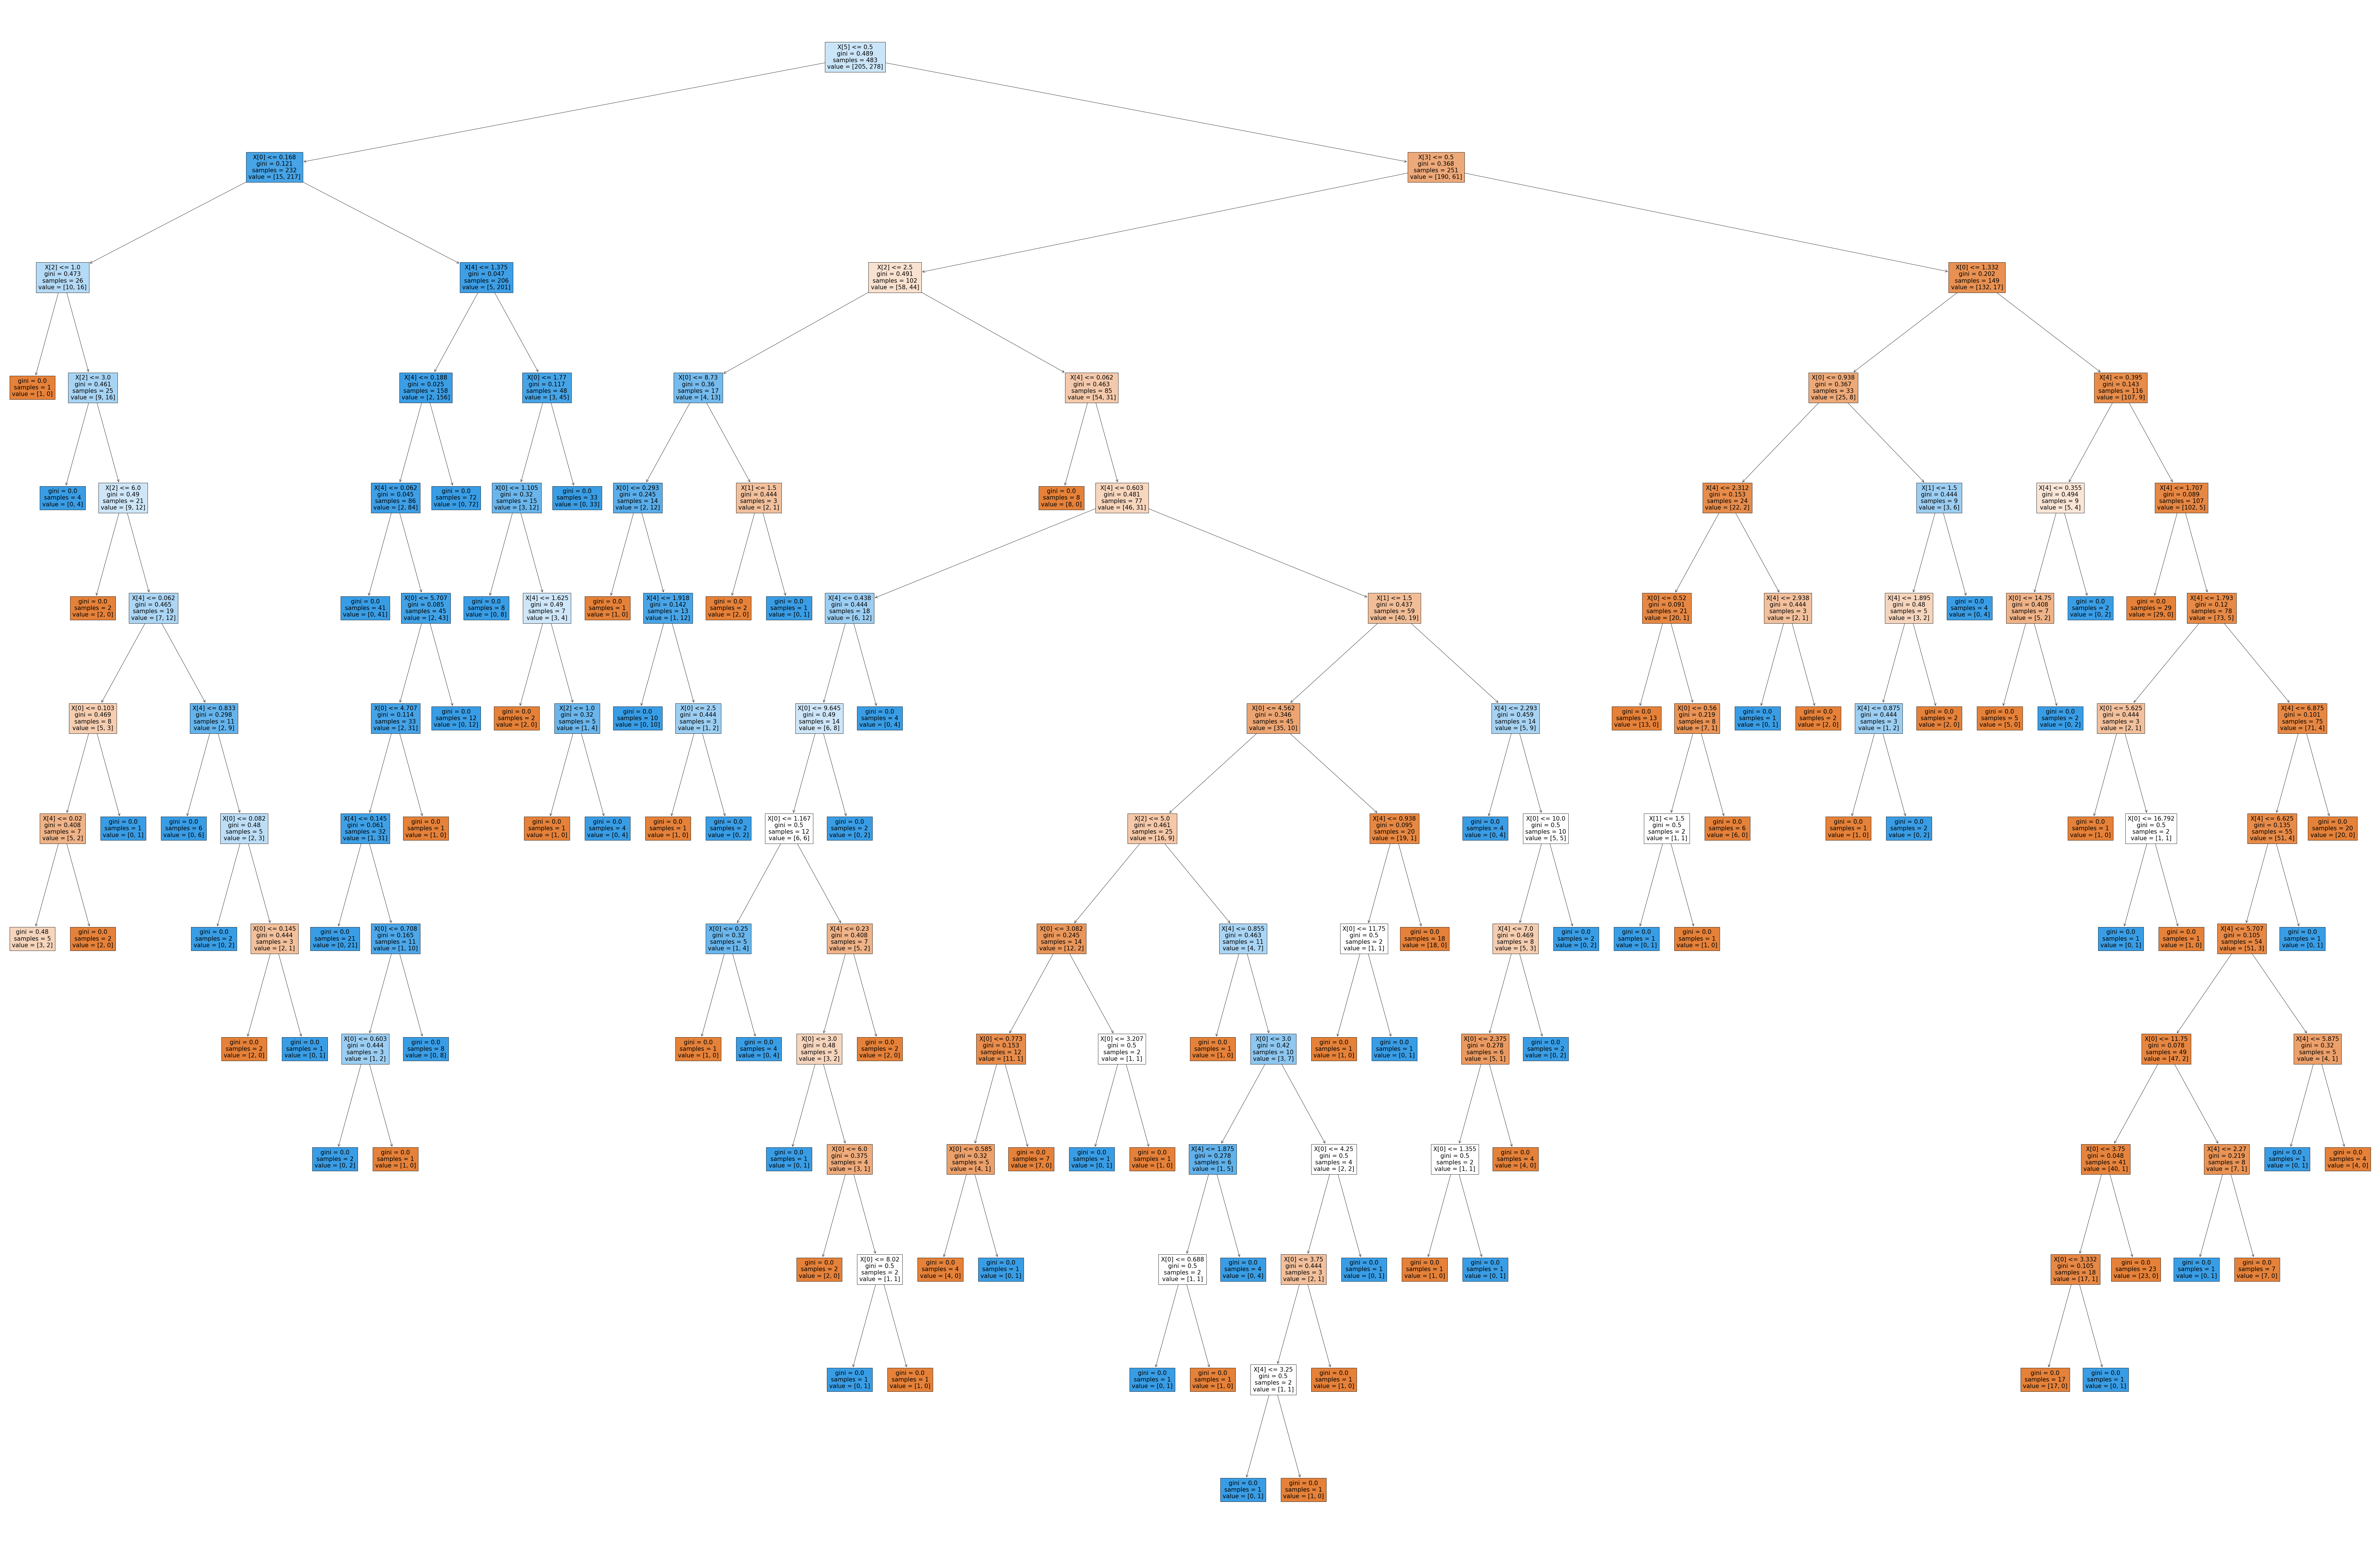

In [401]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
# Decision Tree Application:
decision_tree = DecisionTreeClassifier(random_state=42)
decision_tree.fit(X_train, y_train)

# Applico il decision tree:
y_pred = decision_tree.predict(X_test)

# Visualizza l'albero decisionale
fig, ax = plt.subplots(figsize=(150, 100))
plot_tree(decision_tree, filled=True, ax=ax)
plt.plot()

model = decision_tree

## Confusion Matrix:

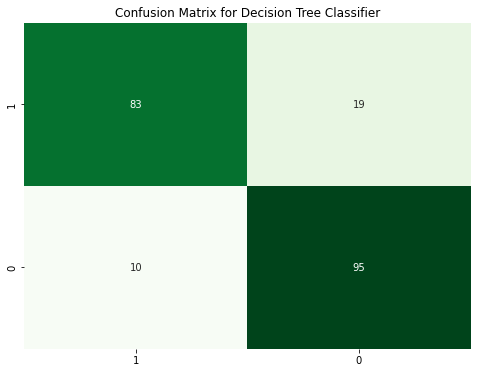

Decision Tree Accuracy: 0.8599033816425121


In [433]:
# Assuming y_test and y_pred are already defined for the Decision Tree model
conf_matrix_dt = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix for Decision Tree
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_dt, annot=True, fmt="d", cmap="Greens", cbar=False,
            xticklabels=['1', '0'], yticklabels=['1', '0'])
plt.title('Confusion Matrix for Decision Tree Classifier')
plt.show()

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Decision Tree Accuracy: {accuracy}")

## Classification report (to show the model precision):

In [430]:
classification_rep = classification_report(y_test, y_pred)
print("\nClassification Report:")
print(classification_rep)


Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.81      0.85       102
           1       0.83      0.90      0.87       105

    accuracy                           0.86       207
   macro avg       0.86      0.86      0.86       207
weighted avg       0.86      0.86      0.86       207



## Complexity Parameter:
### Vediamo come varia l'accuratezza dell'albero decizionale in funzione della complessità dell'albero

In [404]:
path = model.cost_complexity_pruning_path(X_train, y_train)

ccp_alphas = path.ccp_alphas

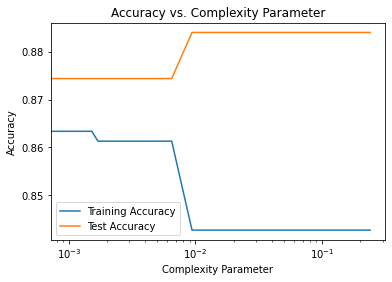

In [405]:
#complexity_values = [0.001, 0.01, 0.1, 1, 10, 100]
ccp_alphas = path.ccp_alphas

# Addestra l'albero decisionale con diversi valori di complessità
train_accuracy = []
test_accuracy = []
for complexity in ccp_alphas:
    clf = DecisionTreeClassifier(max_depth=3, ccp_alpha=complexity)
    clf.fit(X_train, y_train)
    train_accuracy.append(clf.score(X_train, y_train))
    test_accuracy.append(clf.score(X_test, y_test))

# Plotta l'accuratezza del modello in funzione del parametro di complessità
plt.plot(ccp_alphas, train_accuracy, label='Training Accuracy')
plt.plot(ccp_alphas, test_accuracy, label='Test Accuracy')
plt.xlabel('Complexity Parameter')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Complexity Parameter')
plt.xscale('log')
plt.legend()
plt.show()

In [406]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)
print(
    "Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
        clfs[-1].tree_.node_count, ccp_alphas[-1]
    )
)

Number of nodes in the last tree is: 1 with ccp_alpha: 0.23928052674089875


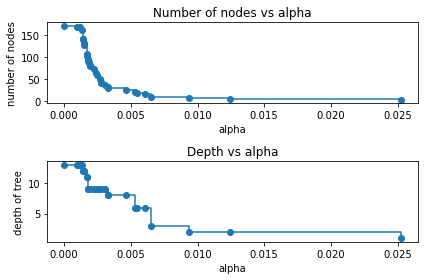

In [407]:
clfs = clfs[:-1]
complexity_values = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1)
ax[0].plot(complexity_values, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(complexity_values, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

Punteggi della cross-validation: [0.50724638 0.7826087  0.91304348 0.82608696 0.91304348 0.8115942
 0.84057971 0.73913043 0.86956522 0.94202899]


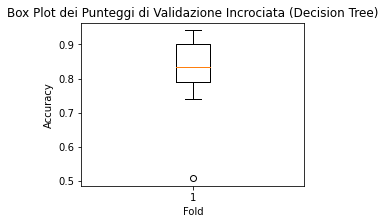

In [408]:
from sklearn.model_selection import cross_val_score
# Esegui la 10-fold cross-validation
scores = cross_val_score(decision_tree, X, y, cv=10, scoring='accuracy')

# Stampa i punteggi della cross-validation
print("Punteggi della cross-validation:", scores)

# Box Plot dei Punteggi
plt.figure(figsize=(4, 3))
plt.boxplot(scores)
plt.title('Box Plot dei Punteggi di Validazione Incrociata (Decision Tree)')
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.show()

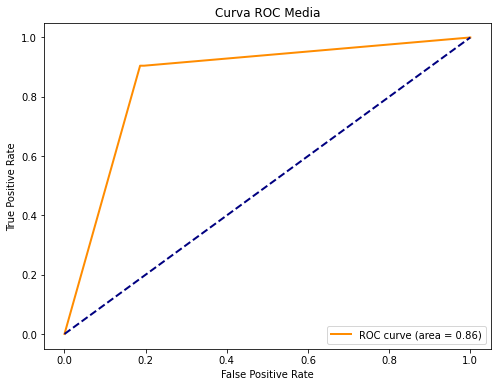

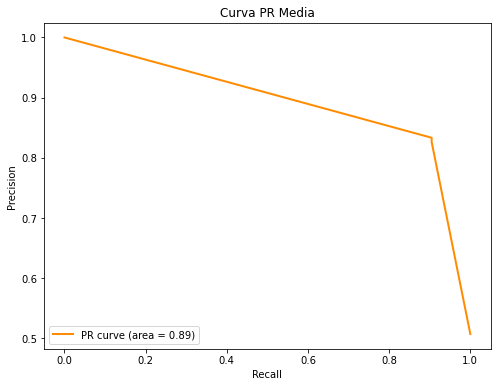

In [409]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve, precision_recall_curve, auc

# Inizializza liste per le curve ROC e PR
all_fpr = []
all_tpr = []
all_precision = []
all_recall = []

# Esegui la 10-fold cross-validation per ottenere le curve ROC e PR medie
for train, test in StratifiedKFold(n_splits=10, shuffle=True, random_state=42).split(X, y):
    decision_tree.fit(X_train, y_train)
    y_pred_prob = decision_tree.predict_proba(X_test)[:, 1]

    # Calcola ROC curve
    fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
    all_fpr.append(fpr)
    all_tpr.append(tpr)

    # Calcola PR curve
    precision, recall, _ = precision_recall_curve(y_test, y_pred_prob)
    all_precision.append(precision)
    all_recall.append(recall)

# Calcola le medie delle curve ROC e PR
mean_fpr = np.mean(all_fpr, axis=0)
mean_tpr = np.mean(all_tpr, axis=0)
mean_precision = np.mean(all_precision, axis=0)
mean_recall = np.mean(all_recall, axis=0)

# Calcola le aree sotto le curve ROC e PR medie
roc_auc = auc(mean_fpr, mean_tpr)
pr_auc = auc(mean_recall, mean_precision)

# Curva ROC Media
plt.figure(figsize=(8, 6))
plt.plot(mean_fpr, mean_tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC Media')
plt.legend(loc='lower right')
plt.show()

# Curva PR Media
plt.figure(figsize=(8, 6))
plt.plot(mean_recall, mean_precision, color='darkorange', lw=2, label=f'PR curve (area = {pr_auc:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Curva PR Media')
plt.legend(loc='lower left')
plt.show()

## KNN (K-Nearest Neighbors):

In [410]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Create KNN classifier
knn_classifier = KNeighborsClassifier(n_neighbors=5)

# Train the KNN classifier
knn_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred_knn = knn_classifier.predict(X_test)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred_knn)
print(f"KNN Accuracy: {accuracy}")

KNN Accuracy: 0.821256038647343


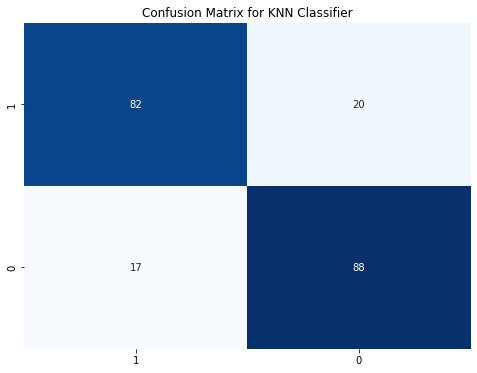

In [431]:
# Assuming y_test and y_pred_knn are already defined
conf_matrix = confusion_matrix(y_test, y_pred_knn)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=['1', '0'], yticklabels=['1', '0'])
plt.title('Confusion Matrix for KNN Classifier')
plt.show()

In [432]:
classification_rep = classification_report(y_test, y_pred_knn)
print("\nClassification Report:")
print(classification_rep)


Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.80      0.82       102
           1       0.81      0.84      0.83       105

    accuracy                           0.82       207
   macro avg       0.82      0.82      0.82       207
weighted avg       0.82      0.82      0.82       207



Punteggi della cross-validation: [0.60869565 0.7826087  0.86956522 0.79710145 0.86956522 0.91304348
 0.82608696 0.72463768 0.88405797 0.75362319]


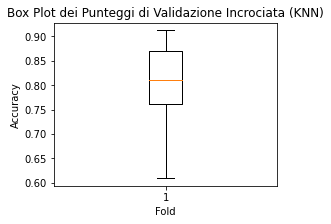

In [413]:
# Esegui la 10-fold cross-validation
scores = cross_val_score(knn_classifier, X, y, cv=10, scoring='accuracy')

# Stampa i punteggi della cross-validation
print("Punteggi della cross-validation:", scores)

# Box Plot dei Punteggi
plt.figure(figsize=(4, 3))
plt.boxplot(scores)
plt.title('Box Plot dei Punteggi di Validazione Incrociata (KNN)')
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.show()

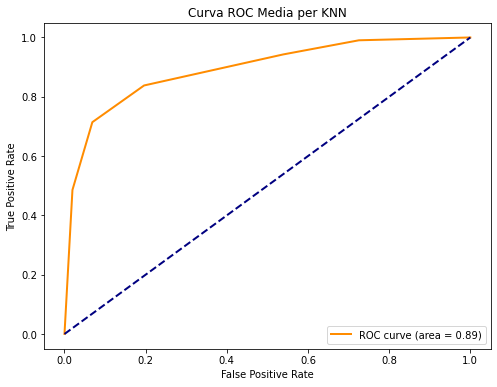

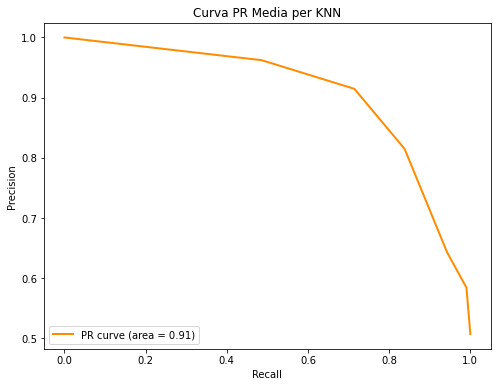

In [414]:
# Inizializza liste per le curve ROC e PR
all_fpr = []
all_tpr = []
all_precision = []
all_recall = []

# Esegui la 10-fold cross-validation per ottenere le curve ROC e PR medie
for train, test in StratifiedKFold(n_splits=10, shuffle=True, random_state=42).split(X, y):
    knn_classifier.fit(X_train, y_train)
    y_pred_prob = knn_classifier.predict_proba(X_test)[:, 1]

    # Calcola ROC curve
    fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
    all_fpr.append(fpr)
    all_tpr.append(tpr)

    # Calcola PR curve
    precision, recall, _ = precision_recall_curve(y_test, y_pred_prob)
    all_precision.append(precision)
    all_recall.append(recall)

# Calcola le medie delle curve ROC e PR
mean_fpr = np.mean(all_fpr, axis=0)
mean_tpr = np.mean(all_tpr, axis=0)
mean_precision = np.mean(all_precision, axis=0)
mean_recall = np.mean(all_recall, axis=0)

# Calcola le aree sotto le curve ROC e PR medie
roc_auc = auc(mean_fpr, mean_tpr)
pr_auc = auc(mean_recall, mean_precision)

# Curva ROC Media
plt.figure(figsize=(8, 6))
plt.plot(mean_fpr, mean_tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC Media per KNN')
plt.legend(loc='lower right')
plt.show()

# Curva PR Media
plt.figure(figsize=(8, 6))
plt.plot(mean_recall, mean_precision, color='darkorange', lw=2, label=f'PR curve (area = {pr_auc:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Curva PR Media per KNN')
plt.legend(loc='lower left')
plt.show()

## Support Vector Machine:

SVM Confusion Matrix:
[[87 15]
 [13 92]]


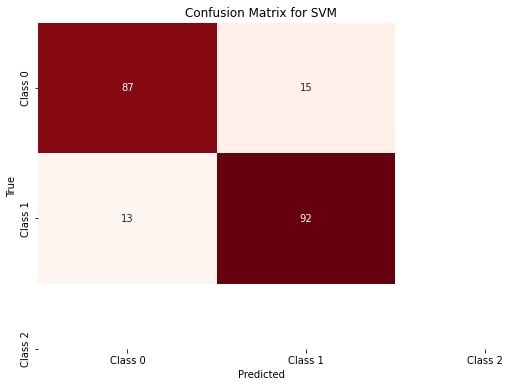

SVM Accuracy: 0.8647342995169082


In [434]:
# Support Vector Machine
from sklearn.svm import SVC

svm_model = SVC(probability=True)
svm_model.fit(X_train, y_train)

svm_pred = svm_model.predict(X_test)
conf_matrix_svm = confusion_matrix(y_test, svm_pred)
print("SVM Confusion Matrix:")
print(conf_matrix_svm)

# Assuming y_test and y_pred are already defined for the Decision Tree model
conf_matrix_dt = confusion_matrix(y_test, svm_pred)

# Plot the confusion matrix for Decision Tree
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_dt, annot=True, fmt="d", cmap="Reds", cbar=False,
            xticklabels=['Class 0', 'Class 1', 'Class 2'], yticklabels=['Class 0', 'Class 1', 'Class 2'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for SVM')
plt.show()

# Evaluate accuracy
accuracy = accuracy_score(y_test, svm_pred)
print(f"SVM Accuracy: {accuracy}")

In [420]:
classification_rep_svm = classification_report(y_test, svm_pred)
print("\nSVM Classification Report:")
print(classification_rep_svm)


SVM Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.85      0.86       102
           1       0.86      0.88      0.87       105

    accuracy                           0.86       207
   macro avg       0.86      0.86      0.86       207
weighted avg       0.86      0.86      0.86       207



**The previous prints show Confusion Matrix & Classification Report for the SVM Algorithm**

Punteggi della cross-validation: [0.43478261 0.8115942  0.95652174 0.91304348 0.95652174 0.95652174
 0.85507246 0.63768116 0.97101449 0.84057971]


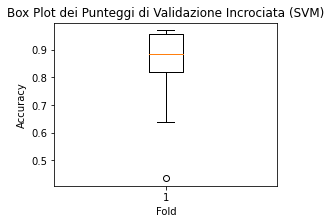

In [435]:
# Esegui la 10-fold cross-validation
scores = cross_val_score(svm_model, X, y, cv=10, scoring='accuracy')

# Stampa i punteggi della cross-validation
print("Punteggi della cross-validation:", scores)

# Box Plot dei Punteggi
plt.figure(figsize=(4, 3))
plt.boxplot(scores)
plt.title('Box Plot dei Punteggi di Validazione Incrociata (SVM)')
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.show()

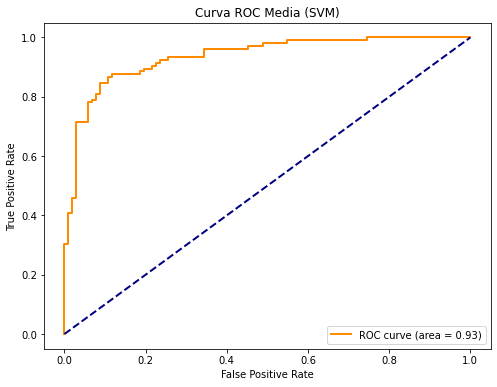

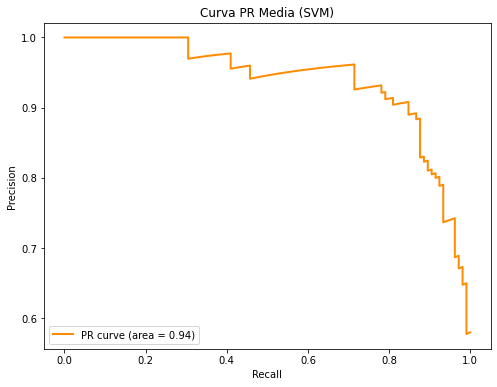

In [422]:
# Inizializza liste per le curve ROC e PR
all_fpr = []
all_tpr = []
all_precision = []
all_recall = []

# Esegui la 10-fold cross-validation per ottenere le curve ROC e PR medie
for train, test in StratifiedKFold(n_splits=10, shuffle=True, random_state=42).split(X, y):
    svm_model.fit(X_train, y_train)
    y_pred_prob = svm_model.predict_proba(X_test)[:, 1]

    # Calcola ROC curve
    fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
    all_fpr.append(fpr)
    all_tpr.append(tpr)

    # Calcola PR curve
    precision, recall, _ = precision_recall_curve(y_test, y_pred_prob)
    all_precision.append(precision)
    all_recall.append(recall)

# Calcola le medie delle curve ROC e PR
mean_fpr = np.mean(all_fpr, axis=0)
mean_tpr = np.mean(all_tpr, axis=0)
mean_precision = np.mean(all_precision, axis=0)
mean_recall = np.mean(all_recall, axis=0)

# Calcola le aree sotto le curve ROC e PR medie
roc_auc = auc(mean_fpr, mean_tpr)
pr_auc = auc(mean_recall, mean_precision)

# Curva ROC Media
plt.figure(figsize=(8, 6))
plt.plot(mean_fpr, mean_tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC Media (SVM)')
plt.legend(loc='lower right')
plt.show()

# Curva PR Media
plt.figure(figsize=(8, 6))
plt.plot(mean_recall, mean_precision, color='darkorange', lw=2, label=f'PR curve (area = {pr_auc:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Curva PR Media (SVM)')
plt.legend(loc='lower left')
plt.show()